Predicting Delivery Time for a Zomato Dataset for the year 2022

**EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/Zomato Dataset.csv')
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    78.116106  12-02-2022       21:55             22:10   
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   
3                    75.829346  13-02-2022       09:20             09:30   
4                    80.502929  14-02-2022       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

Treating Nulls

In [ ]:
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

<ipython-input-5-550060d742dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-5-550060d742dc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [ ]:
# Converting 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  float64       
 3   Delivery_person_Ratings      45584 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   21001 non-null  datetime64[ns]
 9   Time_Orderd                  45584 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           45584 non-nu

In [ ]:
# Fill missing dates with the median date
median_date = df['Order_Date'].median()
df['Order_Date'].fillna(median_date, inplace=True)

<ipython-input-7-f65e2b3b14fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Order_Date'].fillna(median_date, inplace=True)


In [ ]:
# Converting numerical columns to appropriate types
numerical_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude',
                     'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  float64       
 3   Delivery_person_Ratings      45584 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  45584 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           45584 non-nu

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b7c92135c4e52880395a3d5436cfb856cc7ac55f4bfafe66635041e610cb21d4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Some Observations

In [ ]:
average_delivery_time = df['Time_taken (min)'].mean()
print(f"The average delivery time is {average_delivery_time:.2f} minutes.")

The average delivery time is 26.29 minutes.


In [ ]:
city_with_highest_rating = df.groupby('City')['Delivery_person_Ratings'].mean().idxmax()
highest_rating = df.groupby('City')['Delivery_person_Ratings'].mean().max()
print(f"The city with the highest average delivery person rating is {city_with_highest_rating} with a rating of {highest_rating:.2f}.")

The city with the highest average delivery person rating is Urban with a rating of 4.67.


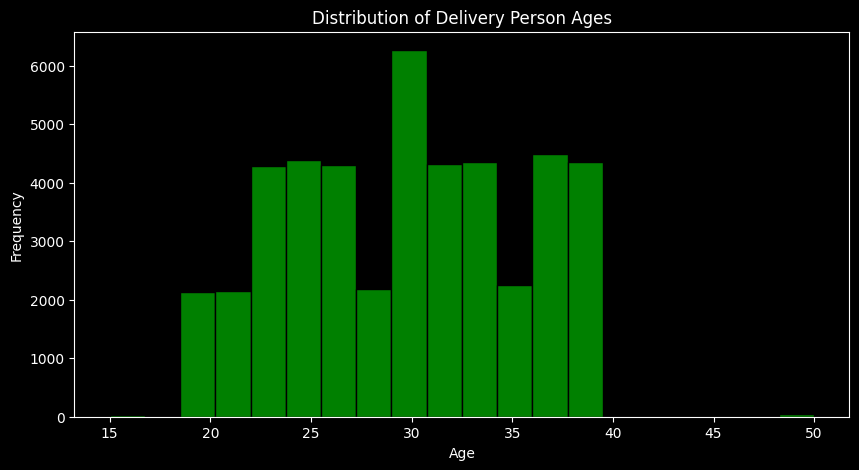

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['Delivery_person_Age'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Delivery Person Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation = df['Delivery_person_Ratings'].corr(df['Vehicle_condition'])
print(f"The correlation between delivery person ratings and vehicle condition is {correlation:.2f}.")

The correlation between delivery person ratings and vehicle condition is 0.03.


In [ ]:
most_common_order_type = df['Type_of_order'].mode()[0]
print(f"The most common type of order is {most_common_order_type}.")

The most common type of order is Snack.


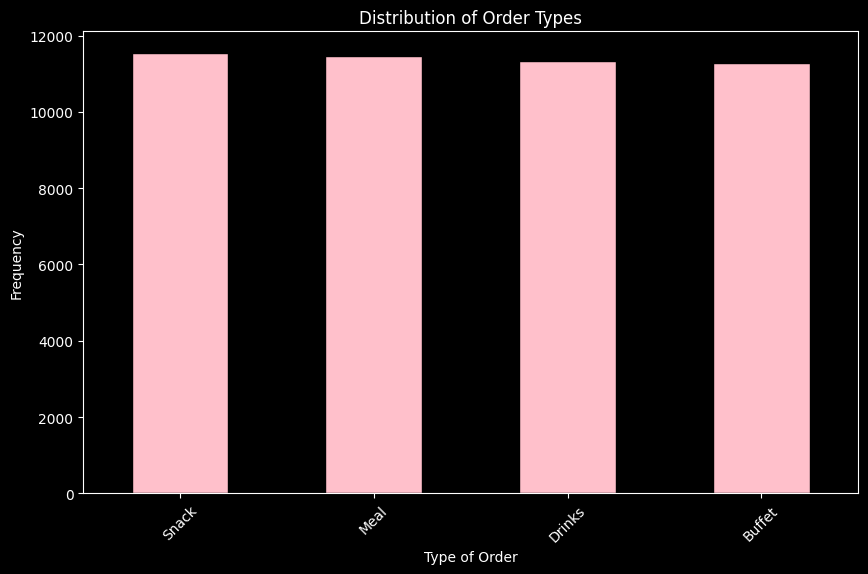

In [ ]:
order_type_counts = df['Type_of_order'].value_counts()

plt.figure(figsize=(10, 6))
order_type_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Distribution of Order Types')
plt.xlabel('Type of Order')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
average_time_by_weather = df.groupby('Weather_conditions')['Time_taken (min)'].mean()
print("Average delivery time by weather condition:")
print(average_time_by_weather)

Average delivery time by weather condition:
Weather_conditions
Cloudy        28.917164
Fog           28.738179
Sandstorms    25.875500
Stormy        25.868803
Sunny         21.856770
Windy         26.118836
Name: Time_taken (min), dtype: float64


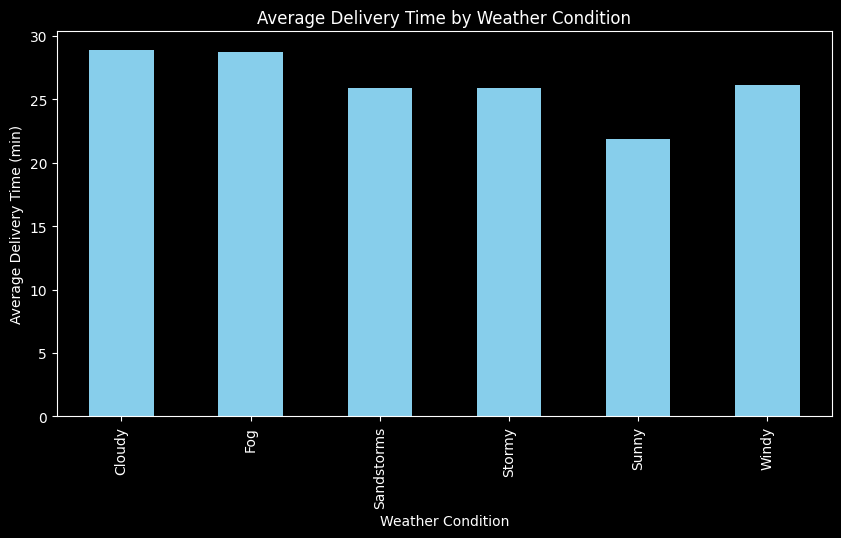

In [ ]:
average_time_by_weather.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Average Delivery Time by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Delivery Time (min)')
plt.show()

In [ ]:
average_time_festival = df.groupby('Festival')['Time_taken (min)'].mean()
print("Average delivery time during festivals vs non-festivals:")
print(average_time_festival)

Average delivery time during festivals vs non-festivals:
Festival
No     25.908521
Yes    45.517857
Name: Time_taken (min), dtype: float64


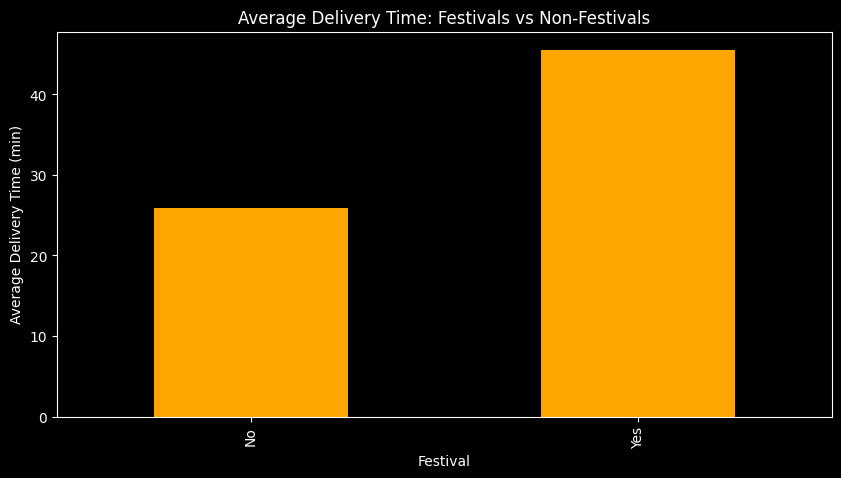

In [ ]:
average_time_festival.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Average Delivery Time: Festivals vs Non-Festivals')
plt.xlabel('Festival')
plt.ylabel('Average Delivery Time (min)')
plt.show()

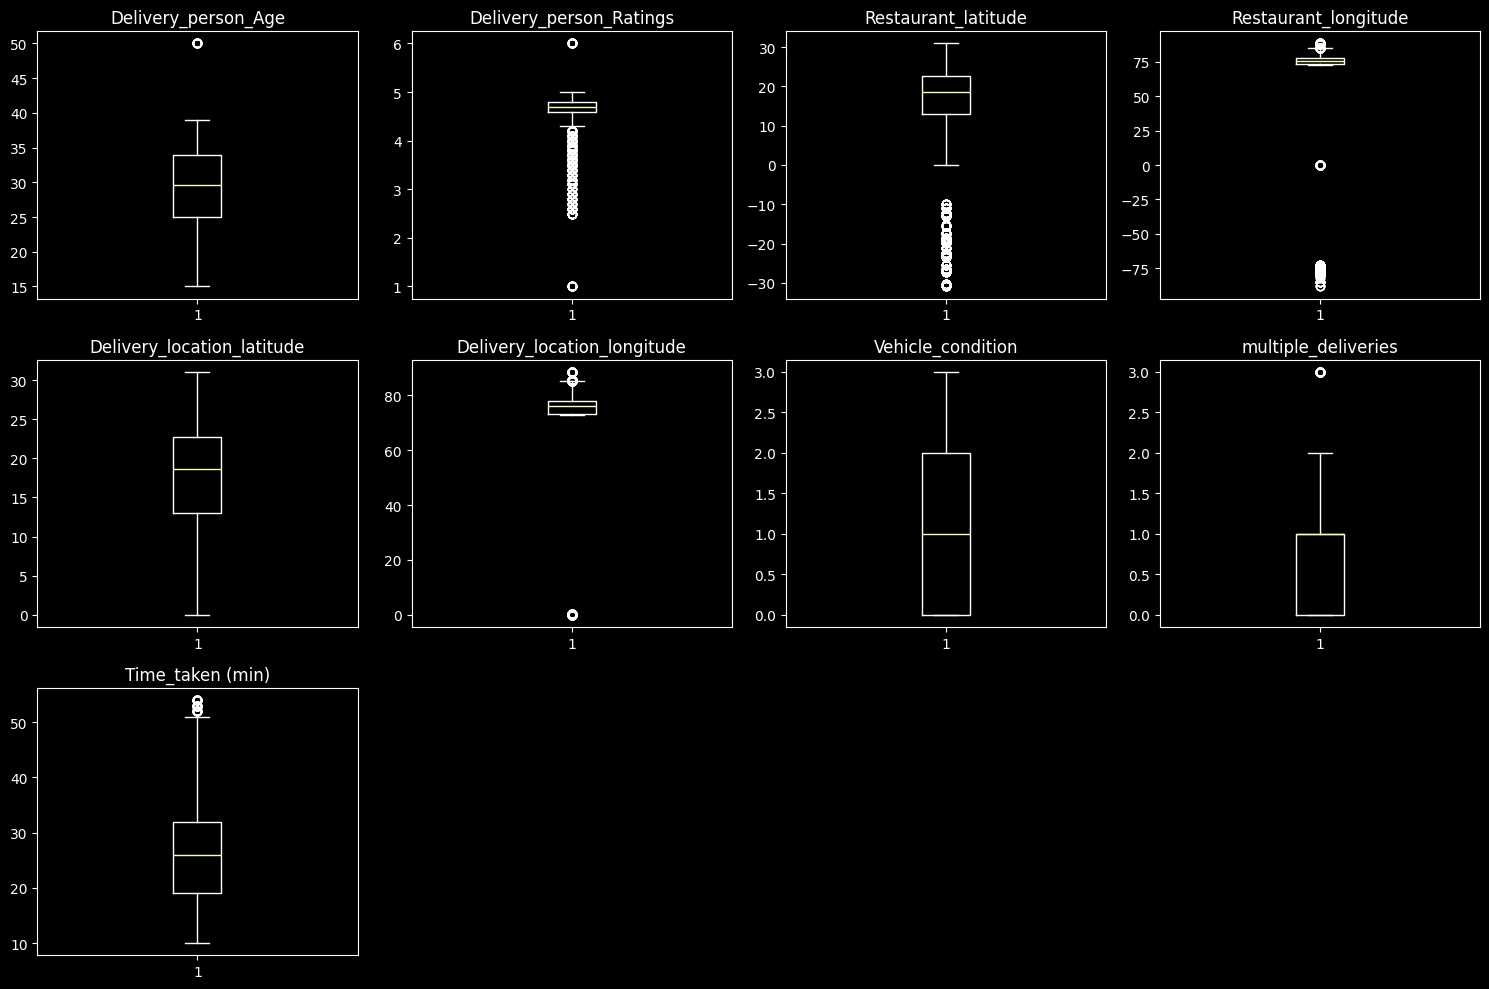

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
  plt.subplot(3, 4, i + 1)
  plt.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

**ML Model**

---



Preparing Data for Ml modeling

In [ ]:
df = df.drop(['ID', 'Delivery_person_ID'], axis=1)

In [ ]:
df.head()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 36.0                      4.2            30.327968   
1                 21.0                      4.7            10.003064   
2                 23.0                      4.7            18.562450   
3                 34.0                      4.3            30.899584   
4                 24.0                      4.7            26.463504   

   Restaurant_longitude  Delivery_location_latitude  \
0             78.046106                   30.397968   
1             76.307589                   10.043064   
2             73.916619                   18.652450   
3             75.809346                   30.919584   
4             80.372929                   26.593504   

   Delivery_location_longitude Order_Date Time_Orderd Time_Order_picked  \
0                    78.116106 2022-12-02       21:55             22:10   
1                    76.347589 2022-05-04       14:55             15:05   
2                    74.006619 2022-04-03       17:30             17:40   
3                    75.829346 2022-05-04       09:20             09:30   
4                    80.502929 2022-05-04       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

Defining Target Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
  df[column] = le.fit_transform(df[column])
print(df.head(7))

   Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 36.0                      4.2            30.327968   
1                 21.0                      4.7            10.003064   
2                 23.0                      4.7            18.562450   
3                 34.0                      4.3            30.899584   
4                 24.0                      4.7            26.463504   
5                 29.0                      4.5            19.176269   
6                 35.0                      4.0            12.311072   

   Restaurant_longitude  Delivery_location_latitude  \
0             78.046106                   30.397968   
1             76.307589                   10.043064   
2             73.916619                   18.652450   
3             75.809346                   30.919584   
4             80.372929                   26.593504   
5             72.836721                   19.266269   
6             76.654878               

In [ ]:
X = df.drop(['Time_taken (min)', 'Order_Date', 'Time_Orderd', 'Time_Order_picked'], axis=1)
Y = df['Time_taken (min)']

In [ ]:
#split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.20, random_state = 42)

In [ ]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36467, 14)
y_train shape: (36467,)
X_test shape: (9117, 14)
y_test shape: (9117,)


**ML Algortithms**



1. Multiple Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Train accuracy
y_pred_train = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = math.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R2 score: {r2_train:.2f}")


Mean Squared Error (MSE): 50.36
Root Mean Squared Error (RMSE): 7.10
R-squared (R2): 0.43
Train RMSE: 7.13
Train R2 score: 0.42


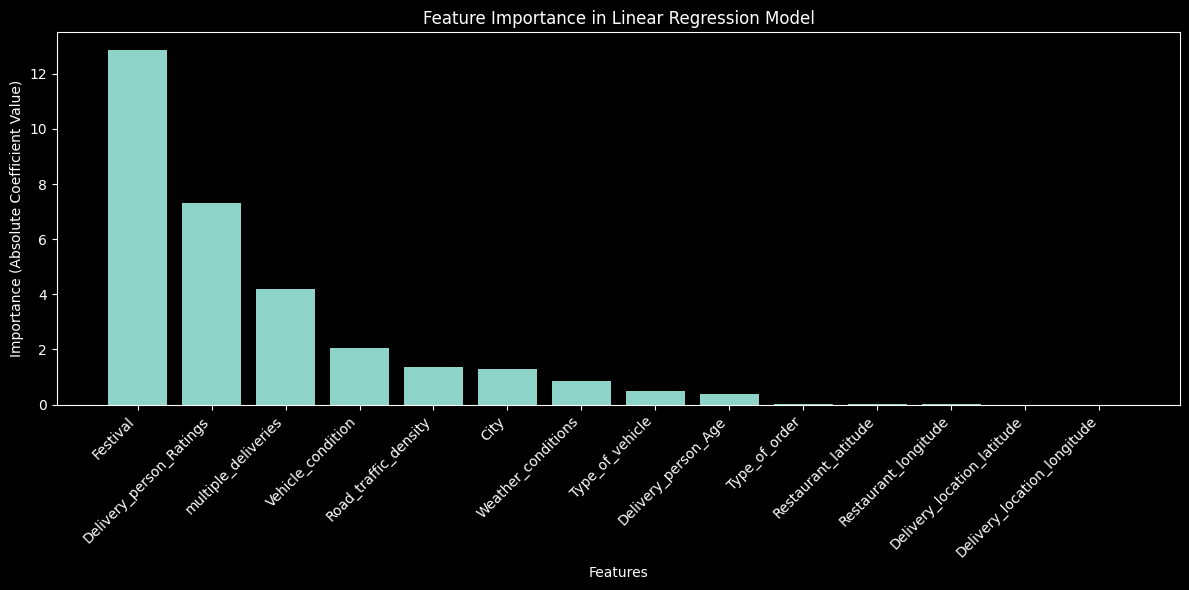

In [ ]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_)})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance['Feature'], importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance (Absolute Coefficient Value)')
plt.title('Feature Importance in Linear Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by='VIF', ascending=False))


                        feature         VIF
5   Delivery_location_longitude  112.431163
3          Restaurant_longitude   91.748388
1       Delivery_person_Ratings   46.765313
4    Delivery_location_latitude   40.918422
2           Restaurant_latitude   30.402853
0           Delivery_person_Age   25.027363
10              Type_of_vehicle   14.635138
7          Road_traffic_density    4.484175
6            Weather_conditions    3.084072
11          multiple_deliveries    2.827350
9                 Type_of_order    2.803926
8             Vehicle_condition    2.606847
13                         City    1.304756
12                     Festival    1.054509


2. Decision Tree Regressor

Decision Tree Regression:
Mean Squared Error (MSE): 44.21
Root Mean Squared Error (RMSE): 6.65
R-squared (R2): 0.50
Train RMSE: 0.04
Train R2 score: 1.00


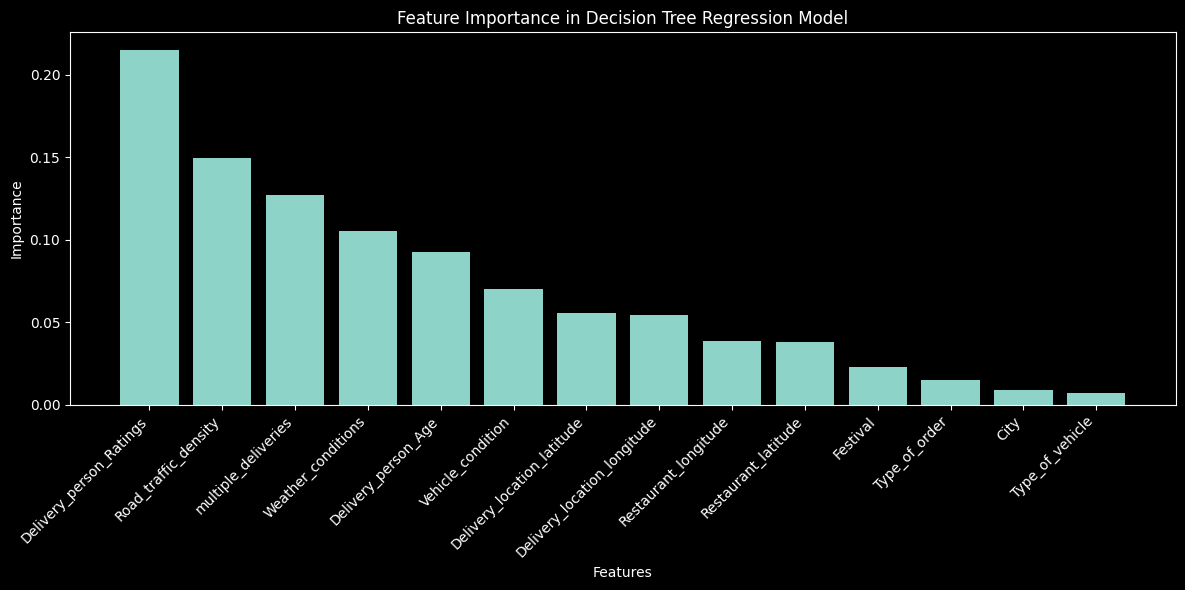

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters
tree_model.fit(x_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(x_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = math.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R-squared (R2): {r2_tree:.2f}")

# Train accuracy for Decision Tree
y_pred_train_tree = tree_model.predict(x_train)
mse_train_tree = mean_squared_error(y_train, y_pred_train_tree)
rmse_train_tree = math.sqrt(mse_train_tree)
r2_train_tree = r2_score(y_train, y_pred_train_tree)
print(f"Train RMSE: {rmse_train_tree:.2f}")
print(f"Train R2 score: {r2_train_tree:.2f}")

# Feature Importance for Decision Tree
importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
importance_tree = importance_tree.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_tree['Feature'], importance_tree['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3. Random Forest Regressor

Random Forest Regression:
Mean Squared Error (MSE): 23.26
Root Mean Squared Error (RMSE): 4.82
R-squared (R2): 0.74
Train RMSE: 1.77
Train R2 score: 0.96


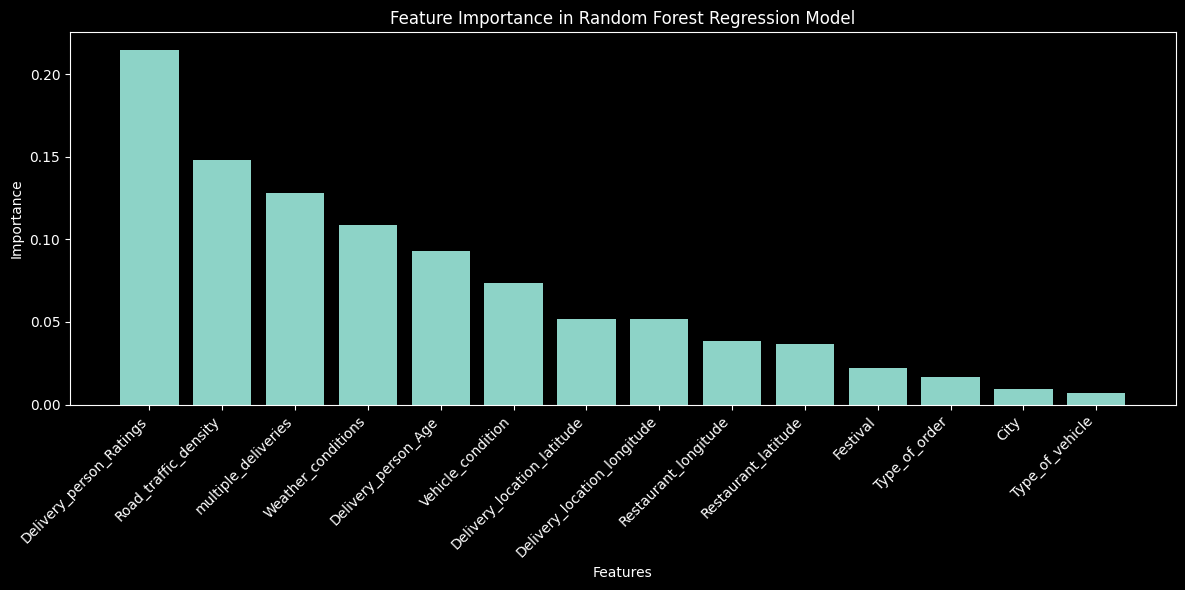

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # You can adjust hyperparameters
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

# Train accuracy for Random Forest
y_pred_train_rf = rf_model.predict(x_train)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
rmse_train_rf = math.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
print(f"Train RMSE: {rmse_train_rf:.2f}")
print(f"Train R2 score: {r2_train_rf:.2f}")

# Feature Importance for Random Forest
importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_rf['Feature'], importance_rf['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


4. SVM Regressor

In [ ]:
from sklearn.svm import SVsvr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(x_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = math.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression:")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")

# Train accuracy for SVR
y_pred_train_svr = svr_model.predict(x_train)
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
rmse_train_svr = math.sqrt(mse_train_svr)
r2_train_svr = r2_score(y_train, y_pred_train_svr)
print(f"Train RMSE: {rmse_train_svr:.2f}")
print(f"Train R2 score: {r2_train_svr:.2f}")


Support Vector Regression:
Mean Squared Error (MSE): 69.65
Root Mean Squared Error (RMSE): 8.35
R-squared (R2): 0.21
Train RMSE: 8.37
Train R2 score: 0.20


5. XG Boost Regressor

In [ ]:
!pip install xgboost

XGBoost Regression:
Mean Squared Error (MSE): 25.24
Root Mean Squared Error (RMSE): 5.02
R-squared (R2): 0.71
Train RMSE: 4.86
Train R2 score: 0.73


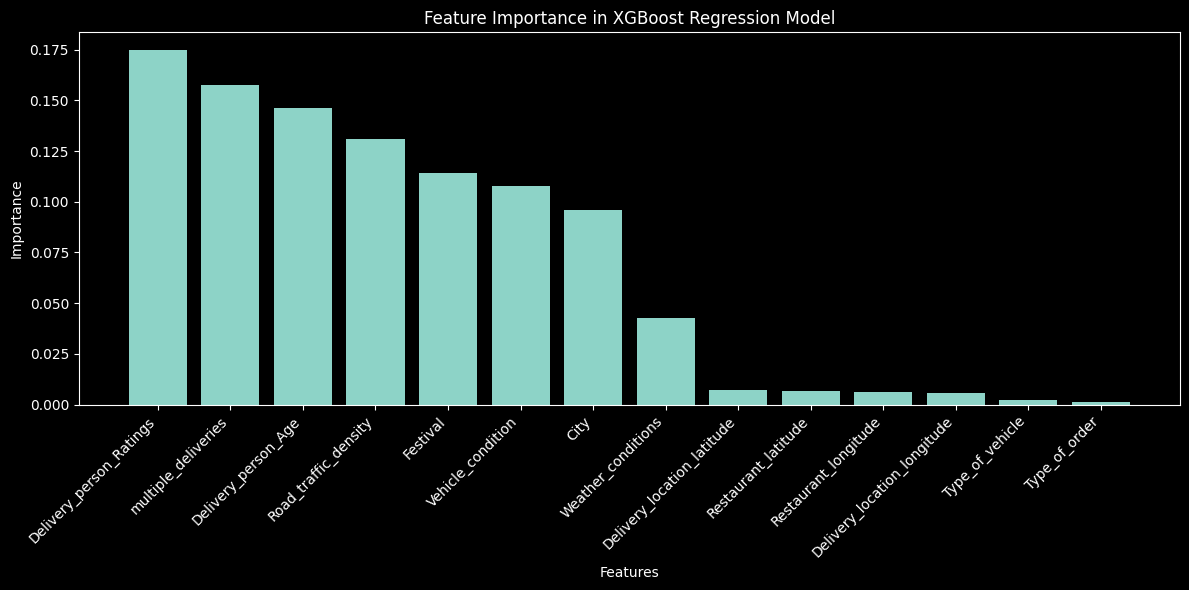

In [ ]:
import xgboost as xgb

# Create XGBoost model with Random Forest as base learner
xgb_model = xgb.XGBRegressor(
    tree_method='hist',  # Use histogram-based algorithm for faster training
    objective='reg:squarederror', # Objective function for regression
    base_score = 0.5, #the initial prediction score of all instances, global bias.
    booster='gbtree', #booster type.
    random_state = 42, #seed for random number generator
    n_estimators = 100, #number of gradient boosted trees.
    max_depth=3 #maximum depth of a tree.
)


# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)


# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")

# Train accuracy for XGBoost
y_pred_train_xgb = xgb_model.predict(x_train)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
rmse_train_xgb = math.sqrt(mse_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
print(f"Train RMSE: {rmse_train_xgb:.2f}")
print(f"Train R2 score: {r2_train_xgb:.2f}")

# Feature Importance for XGBoost
importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
importance_xgb = importance_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_xgb['Feature'], importance_xgb['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in XGBoost Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


6. ADA Boost Regressor

AdaBoost Regression:
Mean Squared Error (MSE): 44.25
Root Mean Squared Error (RMSE): 6.65
R-squared (R2): 0.50
Train RMSE: 6.53
Train R2 score: 0.52


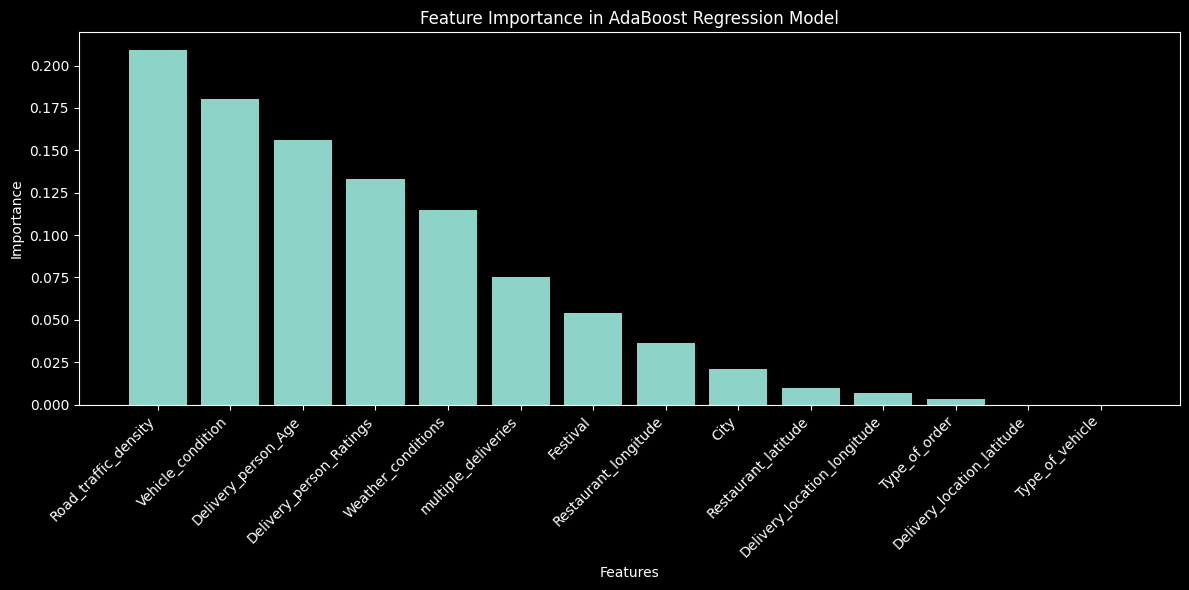

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train the AdaBoost Regressor model
ada_model = AdaBoostRegressor(random_state=42, n_estimators=100)  # You can adjust hyperparameters
ada_model.fit(x_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(x_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = math.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost Regression:")
print(f"Mean Squared Error (MSE): {mse_ada:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ada:.2f}")
print(f"R-squared (R2): {r2_ada:.2f}")

# Train accuracy for AdaBoost
y_pred_train_ada = ada_model.predict(x_train)
mse_train_ada = mean_squared_error(y_train, y_pred_train_ada)
rmse_train_ada = math.sqrt(mse_train_ada)
r2_train_ada = r2_score(y_train, y_pred_train_ada)
print(f"Train RMSE: {rmse_train_ada:.2f}")
print(f"Train R2 score: {r2_train_ada:.2f}")

# Feature Importance for AdaBoost
importance_ada = pd.DataFrame({'Feature': X.columns, 'Importance': ada_model.feature_importances_})
importance_ada = importance_ada.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_ada['Feature'], importance_ada['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in AdaBoost Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


7. LightGBM Regressor

In [ ]:
!pip install lightgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 36467, number of used features: 14
[LightGBM] [Info] Start training from score 26.309677
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 4.904
LightGBM Regression:
Mean Squared Error (MSE): 24.05
Root Mean Squared Error (RMSE): 4.90
R-squared (R2): 0.73


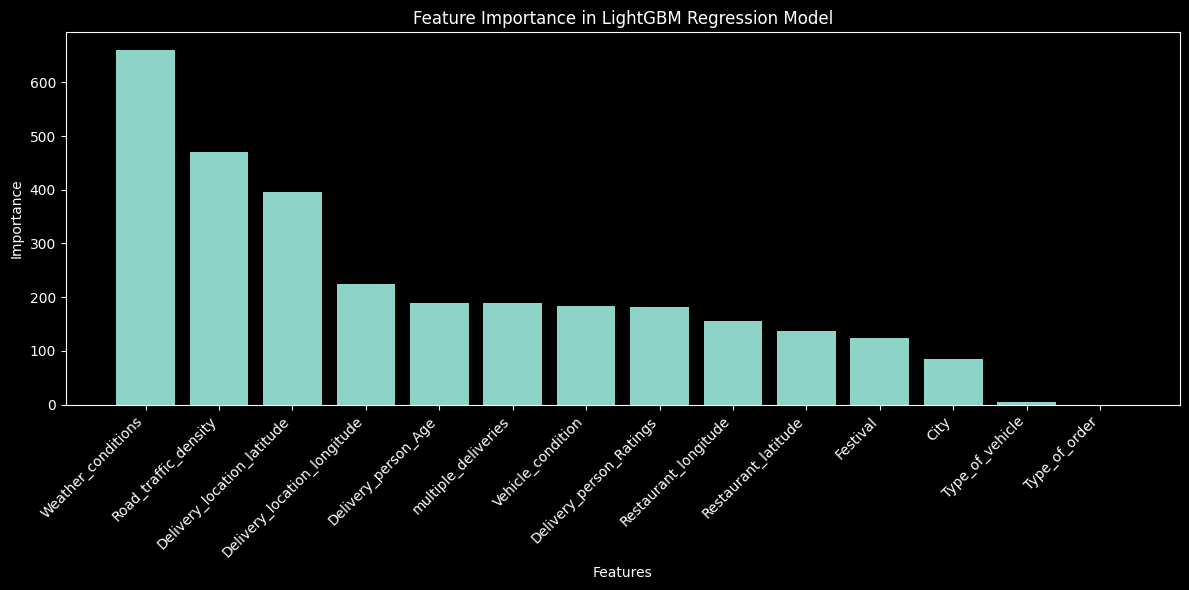

In [ ]:
import lightgbm as lgb
import math
from sklearn.metrics import mean_squared_error, r2_score

# Create LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)


# Set hyperparameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
# Use lgb.early_stopping() callback for early stopping
lgb_model = lgb.train(params,
                      train_data,
                      num_boost_round=100, # Number of boosting rounds (trees)
                      valid_sets=test_data,
                      callbacks=[lgb.early_stopping(stopping_rounds=10)]) # Early stopping to prevent overfitting


# Make predictions
y_pred_lgb = lgb_model.predict(x_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = math.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Regression:")
print(f"Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.2f}")
print(f"R-squared (R2): {r2_lgb:.2f}")

# Feature Importance for LightGBM
importance_lgb = pd.DataFrame({'Feature': X.columns, 'Importance': lgb_model.feature_importance()})
importance_lgb = importance_lgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_lgb['Feature'], importance_lgb['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in LightGBM Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculating rmse_train_lgb for LightGBM
y_pred_train_lgb = lgb_model.predict(x_train)  # Predictions on training data
mse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb)
rmse_train_lgb = math.sqrt(mse_train_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)


data = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVR', 'AdaBoost'],
    'MSE': [mse, mse_tree, mse_rf, mse_xgb, mse_lgb, mse_svr, mse_ada],
    'RMSE': [rmse, rmse_tree, rmse_rf, rmse_xgb, rmse_lgb, rmse_svr, rmse_ada],
    'R2': [r2, r2_tree, r2_rf, r2_xgb, r2_lgb, r2_svr, r2_ada],
    'Train RMSE': [rmse_train, rmse_train_tree, rmse_train_rf, rmse_train_xgb, rmse_train_lgb, rmse_train_svr, rmse_train_ada],
   }

results_df = pd.DataFrame(data)
results_df.index = results_df.index + 1
results_df

Algorithm        MSE      RMSE        R2  Train RMSE
1  Linear Regression  50.360856  7.096538  0.429084    7.129185
2      Decision Tree  44.207634  6.648882  0.498840    0.038659
3      Random Forest  23.259294  4.822789  0.736321    1.771206
4            XGBoost  25.237415  5.023685  0.713896    4.856126
5           LightGBM  24.049197  4.903998  0.727366    4.745825
6                SVR  69.645478  8.345387  0.210464    8.368345
7           AdaBoost  44.245994  6.651766  0.498405    6.533829

In [ ]:
#done